# ECE421 Assignment 1: Logistic Regression
---
Name: Prerak Chaudhari  |  Student Number: 1005114760  |  Date: February 12, 2021

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 1.x selected.
1.15.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def loadData():
    with np.load('/content/drive/MyDrive/ece421/assignments/a1/notMNIST.npz') as dataset:
        Data, Target = dataset['images'], dataset['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

# Part 1: Logistic Regression with Numpy [20 points]

## Part 1.1: Loss Function and Gradient [8 points]

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def loss (W, b, x, y, reg):
    y_est = sigmoid(np.dot(x, W) + b)
    loss_ce = -1 * np.multiply(y, np.log(y_est)) - np.multiply(1-y, np.log(1 - y_est))
    loss_ce = np.mean(loss_ce, 0)
    loss_w = (reg / 2.0) * np.linalg.norm(W, 2)**2
    return loss_ce + loss_w

In [ ]:
def grad_loss(W, b, x, y, reg):
    N = np.shape(x)[0]
    y_est = sigmoid(x.dot(W) + b)
    w_grad = (1.0/N) * (np.dot(x.T, y_est - y)) + reg * W
    b_grad = (1.0/N) * sum(y_est - y)
    return w_grad, b_grad

Testing Loss Function and Gradient

In [ ]:
data = loadData()

x, y = data[0], data[3]
x = np.reshape(x, (3500, -1))
y = y.reshape(-1)

W = np.random.rand(28*28)
W = W /sum(W)
b = np.random.normal(0,1,1)

for i in range(10):
    print(loss(W, i, x, y, 2))

prob = sigmoid(np.dot(x, W) + b)
f = lambda z: z > 0.5
pred = f(prob).reshape(-1).astype(np.int)

print(pred.shape)
print(y.shape)
print(pred.shape[0])

correct = np.where(pred == y)[0].size
print(correct)
print(correct / np.shape(pred)[0])
print()

0.7101337815604508
0.9055782881743075
1.2639452633106554
1.7051474787729535
2.1813976309099665
2.6712734150901367
3.166267668105854
3.6631595932590972
4.160751640025677
4.658601519700661
(3500,)
(3500,)
3500
1757
0.502



## Part 1.2: Gradient Descent Implementation [6 pts]:

In [ ]:
def predict(W, b, x):
    prob = sigmoid(np.dot(x, W) + b)
    f = lambda z: z > 0.5
    pred = f(prob).reshape(-1).astype(np.int)
    return pred

In [ ]:
def evaluate (y_pred, y_true):
    correct = np.where(y_pred == y_true)[0].size
    return correct / np.shape(y_pred)[0]

In [ ]:
def plot_curves(reg, alpha, train_acc, train_loss, val_acc, val_loss, test_acc, test_loss, plot_test):
    n = len(train_acc)
    plt.figure(figsize=(20,10))
    plt.title("Logistic Regression Loss Plot for Regularizer = {} and Learning Rate = {}".format(reg,alpha))
    plt.plot(range(1,1+n), train_loss, label="Train")
    plt.plot(range(1,1+n), val_loss, label="Validation")
    if plot_test:
        plt.plot(range(1,1+n), test_loss, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()
    print("Final Training Loss: {}".format(train_loss[-1]))
    print("Final Validation Loss: {}".format(val_loss[-1]))
    if plot_test:
        print("Final Testing Loss: {}".format(test_loss[-1]))

    plt.figure(figsize=(20,10))
    plt.title("Logistic Regression Accuracy Plot for Regularizer = {} and Learning Rate = {}".format(reg,alpha))
    plt.plot(range(1,1+n), train_acc, label="Train")
    plt.plot(range(1,1+n), val_acc, label="Validation")
    if plot_test:
        plt.plot(range(1,1+n), test_acc, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    if plot_test:
        print("Final Testing Loss: {}".format(test_acc[-1]))

In [ ]:
def grad_descent(W, b, x, y, alpha, epochs, reg, error_tol, val_x, val_y, test_x, test_y, plot_test):
    train_acc, val_acc, train_loss, val_loss, test_acc, test_loss = [], [], [], [], [], []

    x = np.reshape(x, (3500, -1))
    val_x = np.reshape(val_x, (100, -1))
    test_x = np.reshape(test_x, (145, -1))

    y = y.reshape(-1)
    val_y = val_y.reshape(-1)
    test_y = test_y.reshape(-1)

    for e in range(0, epochs):
        train_l = loss(W, b, x, y, reg)
        val_l = loss(W, b, val_x, val_y, reg)
        test_l = loss(W, b, test_x, test_y, reg)

        y_est = predict(W, b, x)
        val_y_est = predict(W, b, val_x)
        test_y_est = predict(W, b, test_x)

        train_a = evaluate(y_est, y)
        val_a = evaluate(val_y_est, val_y)
        test_a = evaluate(test_y_est, test_y)

        train_acc.append(train_a)
        train_loss.append(train_l)
        val_acc.append(val_a)
        val_loss.append(val_l)
        test_acc.append(test_a)
        test_loss.append(test_l)

        weight_grad, bias_grad = grad_loss(W,b,x,y,reg)

        new_weight = W - alpha * weight_grad
        new_bias = b - alpha * bias_grad

        weight_diff = np.linalg.norm(new_weight - W)

        if weight_diff <= error_tol:
            break
        else:
            W = new_weight
            b = new_bias

    plot_curves(reg, alpha, train_acc, train_loss, val_acc, val_loss, test_acc, test_loss, plot_test)

    return W, b

Testing Gradient Descent

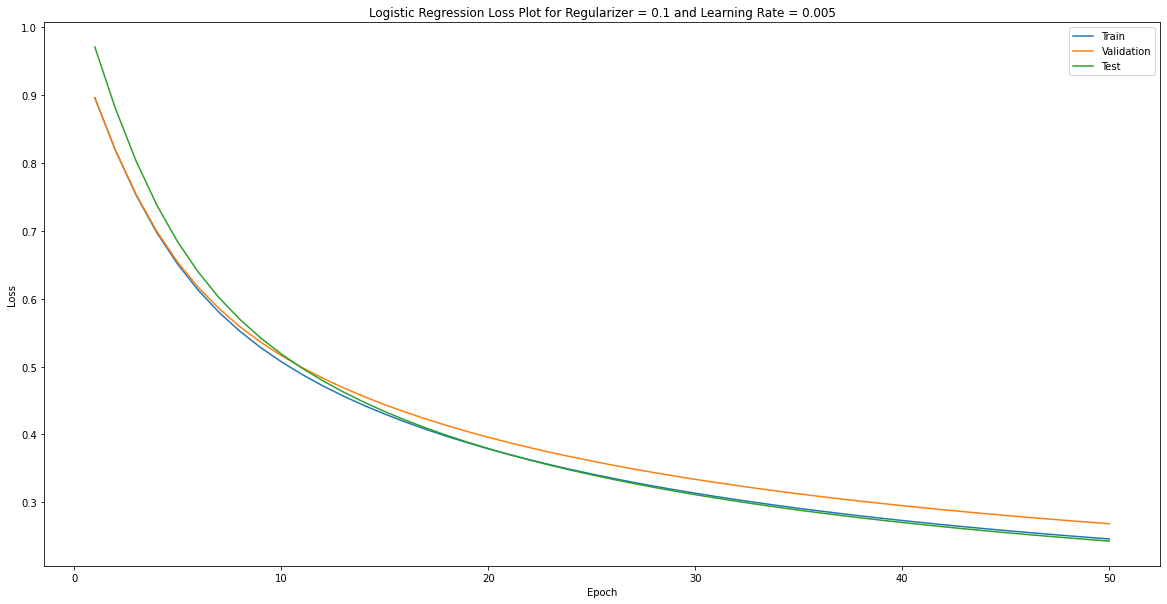

Final Training Loss: 0.24627733858396963
Final Validation Loss: 0.26873001333298724
Final Testing Loss: 0.24315545671424868


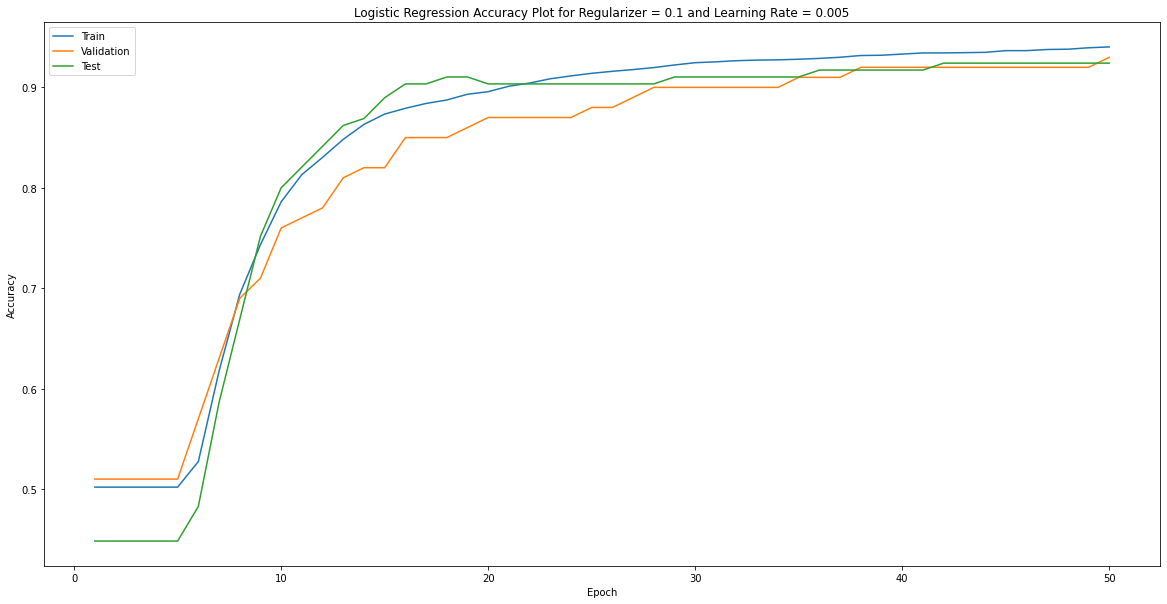

Final Training Accuracy: 0.9402857142857143
Final Validation Accuracy: 0.93
Final Testing Loss: 0.9241379310344827


In [ ]:
data = loadData()
W = np.random.rand(28 * 28)
W = W /sum(W)
b = np.random.normal(0,1,1)
error_tol = 1*10**(-7)
alpha = 0.005
epochs = 50
reg = 0.1
w_opt, b_opt = grad_descent(W, b, data[0], data[3], alpha, epochs, reg, error_tol, data[1], data[4], data[2], data[5], 1)

## Part 1.3: Tuning the Learning Rate [3 pts]:

In [ ]:
data = loadData()
W = np.random.rand(28 * 28)
W = W /sum(W)
b = np.random.normal(0,1,1)
error_tol = 1*10**(-7)
epochs = 5000
reg = 0

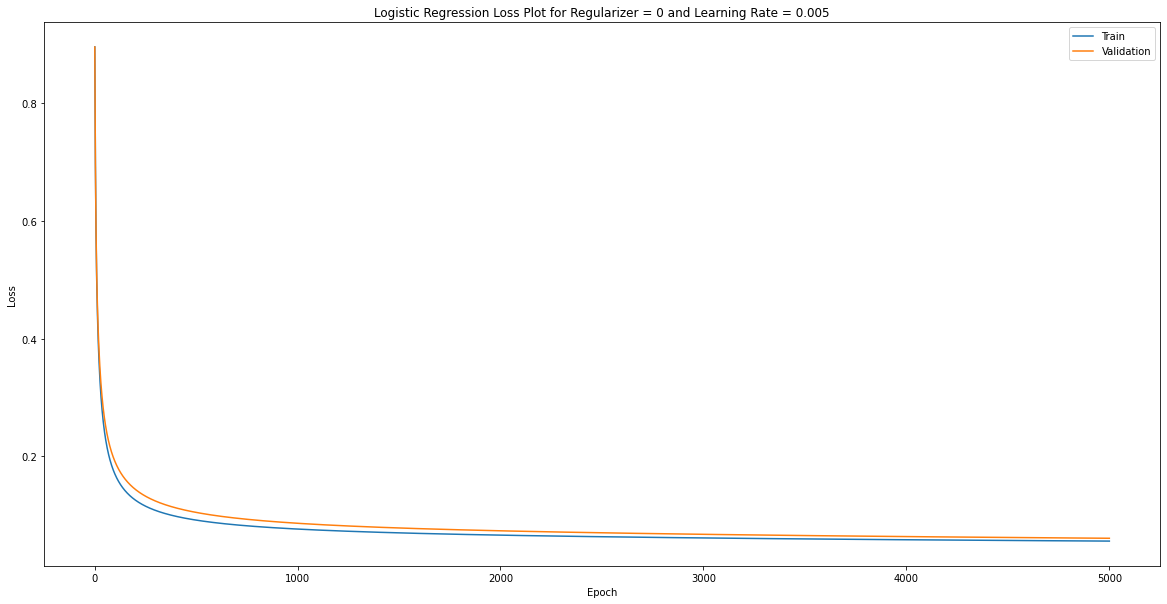

Final Training Loss: 0.056072848286498125
Final Validation Loss: 0.0608714899200882


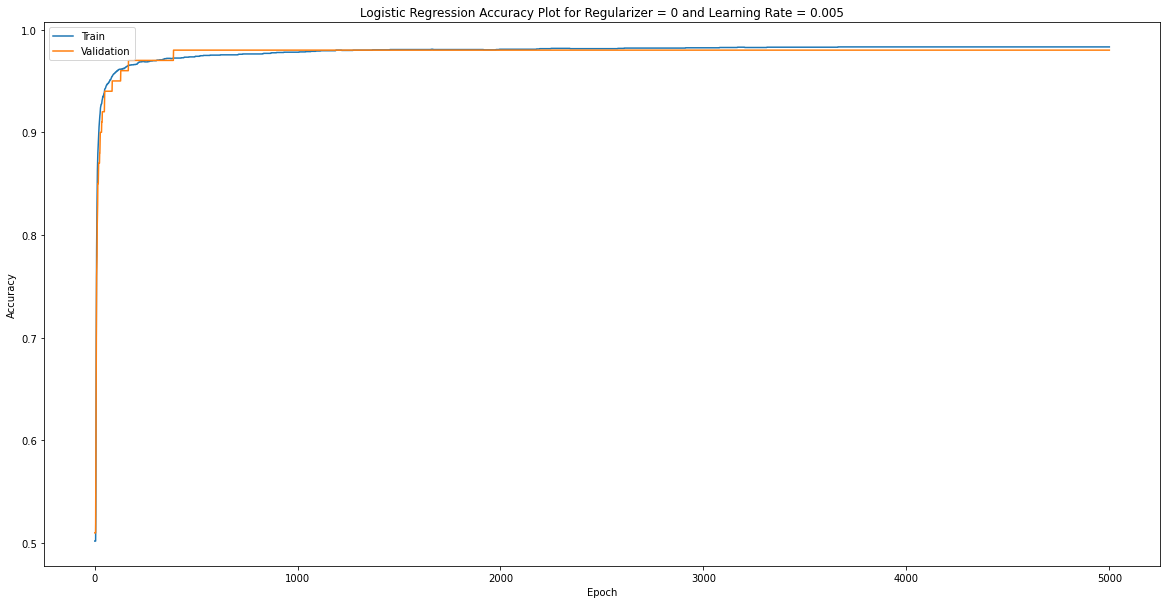

Final Training Accuracy: 0.9831428571428571
Final Validation Accuracy: 0.98


In [ ]:
alpha = 0.005
w_opt, b_opt = grad_descent(W, b, data[0], data[3], alpha, epochs, reg, error_tol, data[1], data[4], data[2], data[5], 0)

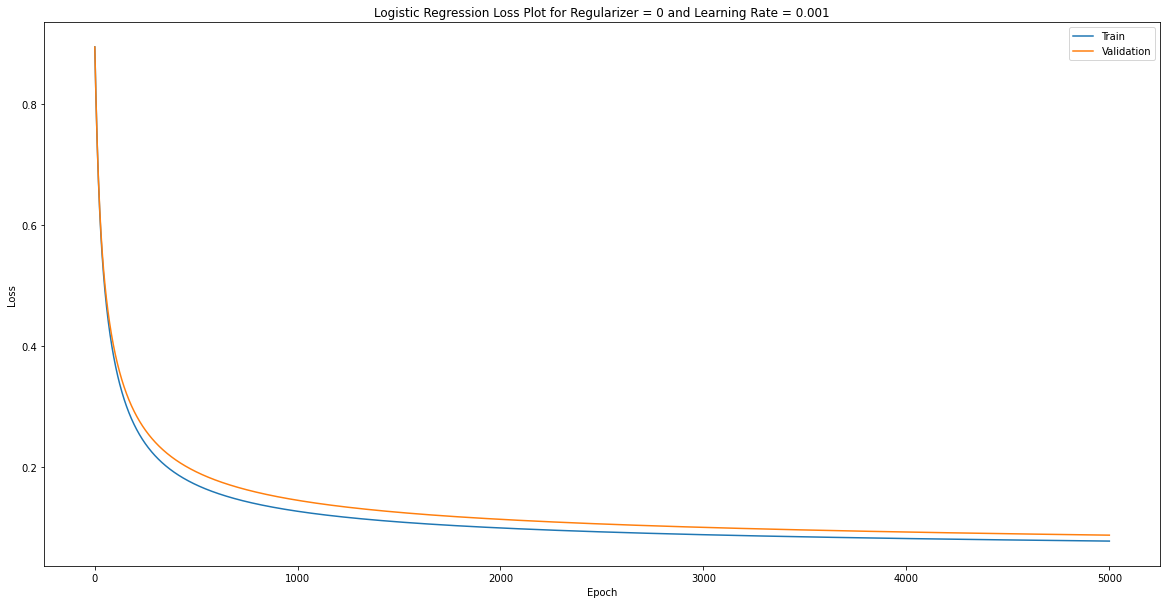

Final Training Loss: 0.07649391970437495
Final Validation Loss: 0.08631971308344964


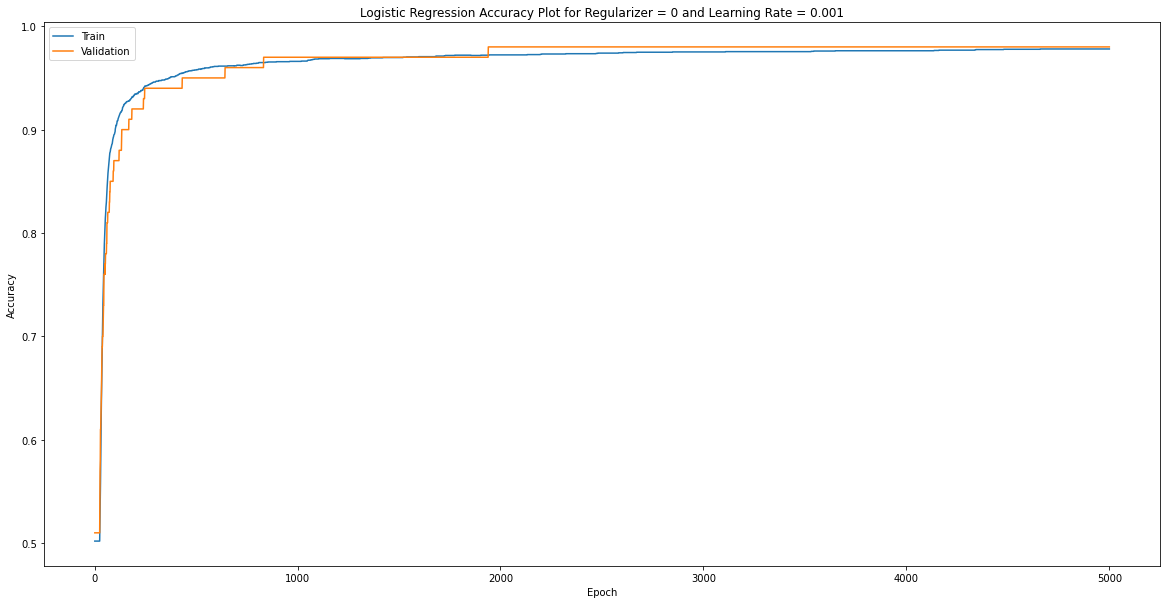

Final Training Accuracy: 0.978
Final Validation Accuracy: 0.98


In [ ]:
alpha = 0.001
w_opt, b_opt = grad_descent(W, b, data[0], data[3], alpha, epochs, reg, error_tol, data[1], data[4], data[2], data[5], 0)

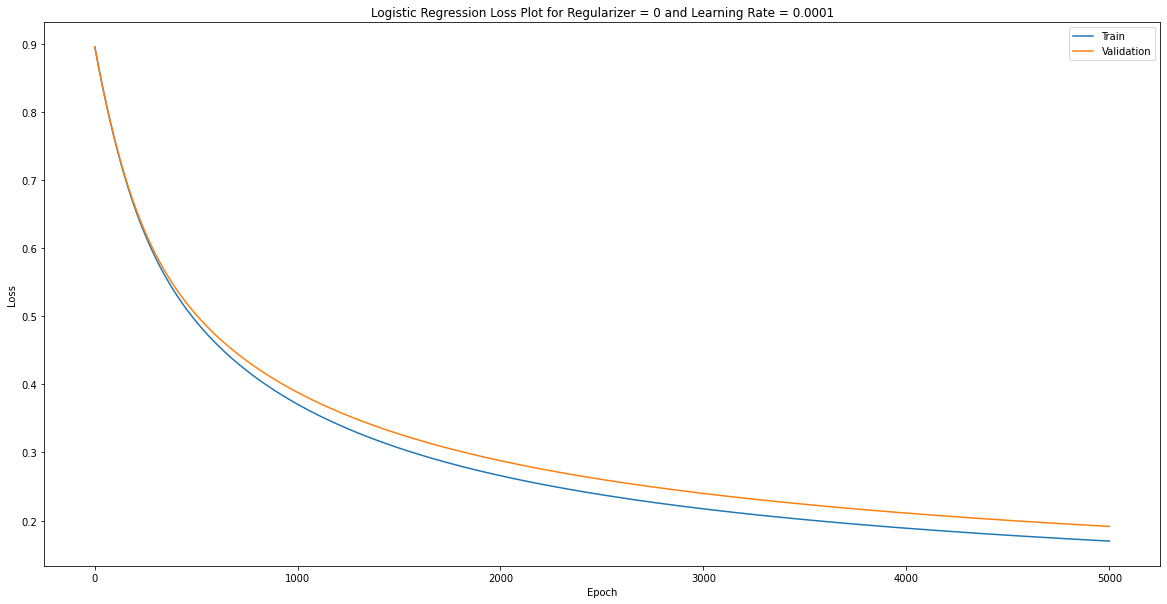

Final Training Loss: 0.1698212683812906
Final Validation Loss: 0.19136478496881806


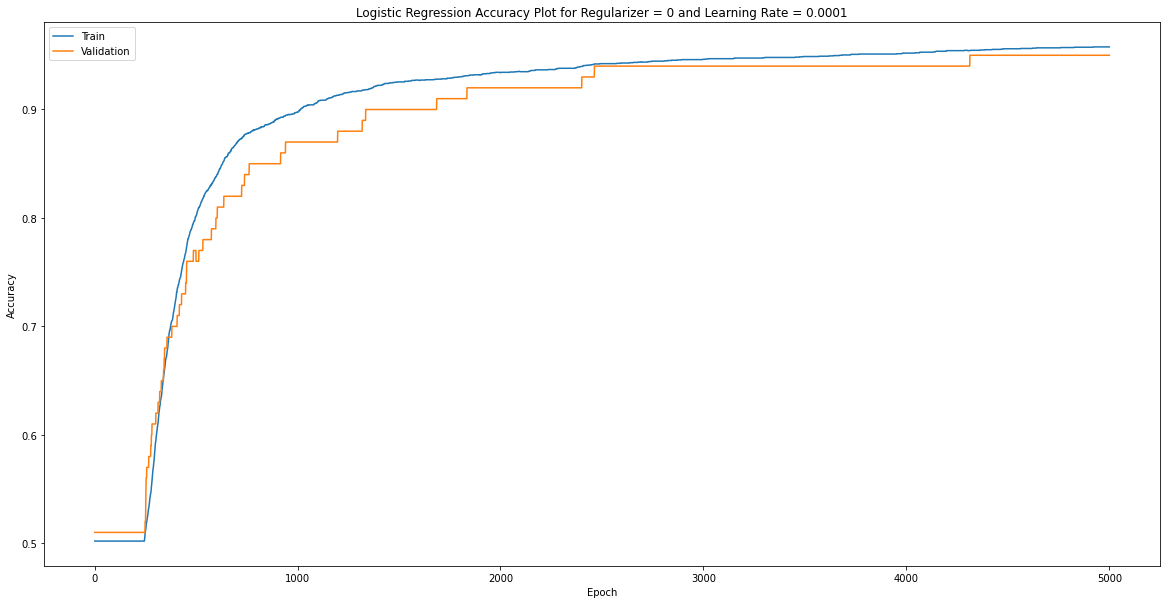

Final Training Accuracy: 0.9577142857142857
Final Validation Accuracy: 0.95


In [ ]:
alpha = 0.0001
w_opt, b_opt = grad_descent(W, b, data[0], data[3], alpha, epochs, reg, error_tol, data[1], data[4], data[2], data[5], 0)

After 5000 epochs, a learning rate of 0.005 gives the best training and validation accuracy. Furthermore, its training and validation loss are also the lowest. Furthermore, it is visually evident that using this learning rate allows us to converge to a solution the fastest. Please see the reported accuracies under the respective graphs.

## Part 1.4: Generalization [3 pts]:

In [ ]:
alpha = 0.005

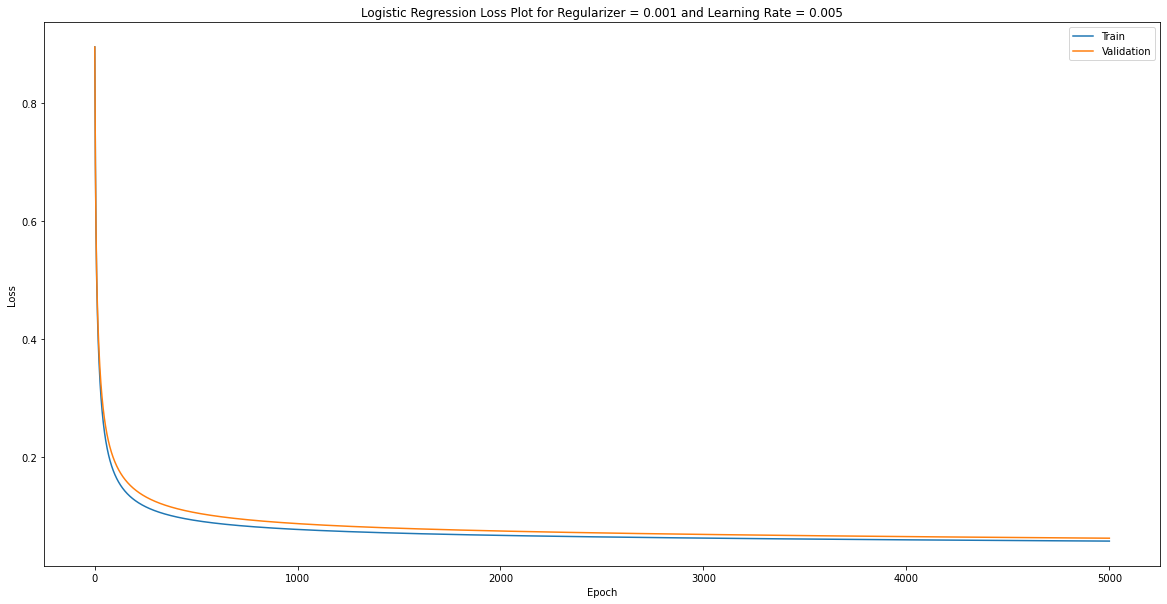

Final Training Loss: 0.05735739766656776
Final Validation Loss: 0.062261026934744466


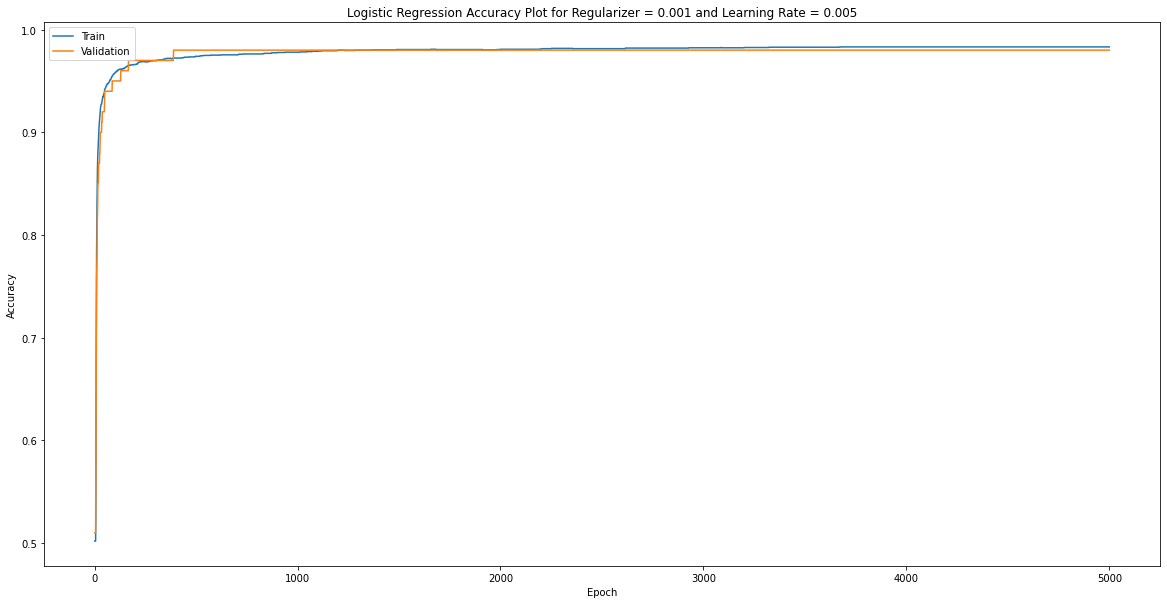

Final Training Accuracy: 0.9831428571428571
Final Validation Accuracy: 0.98


In [ ]:
reg = 0.001
w_opt, b_opt = grad_descent(W, b, data[0], data[3], alpha, epochs, reg, error_tol, data[1], data[4], data[2], data[5], 0)

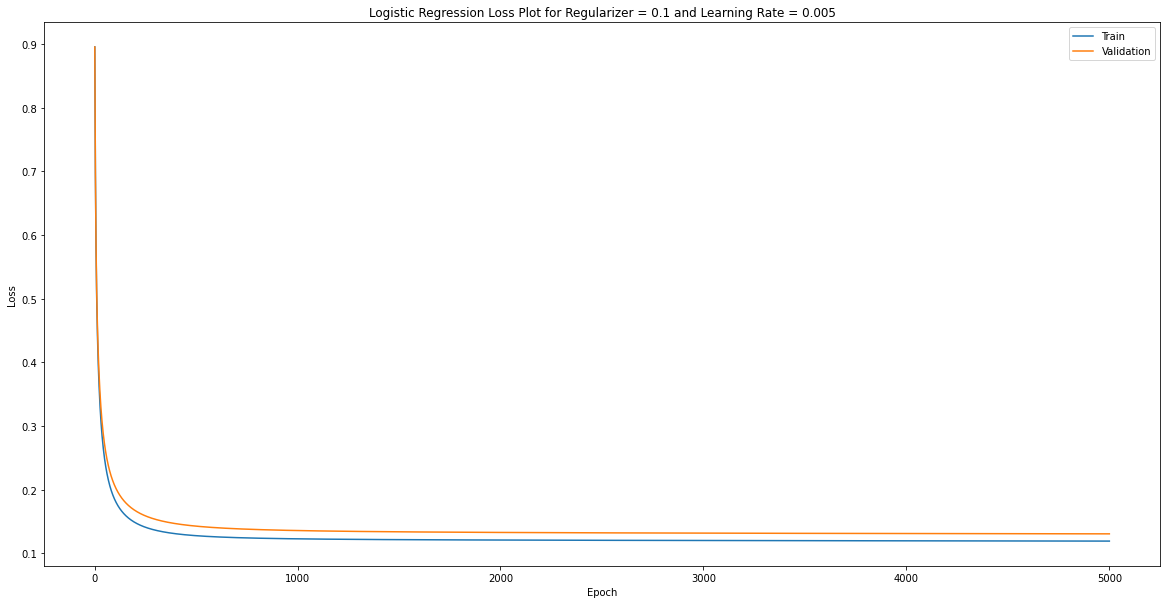

Final Training Loss: 0.11899469383214664
Final Validation Loss: 0.13037580433190724


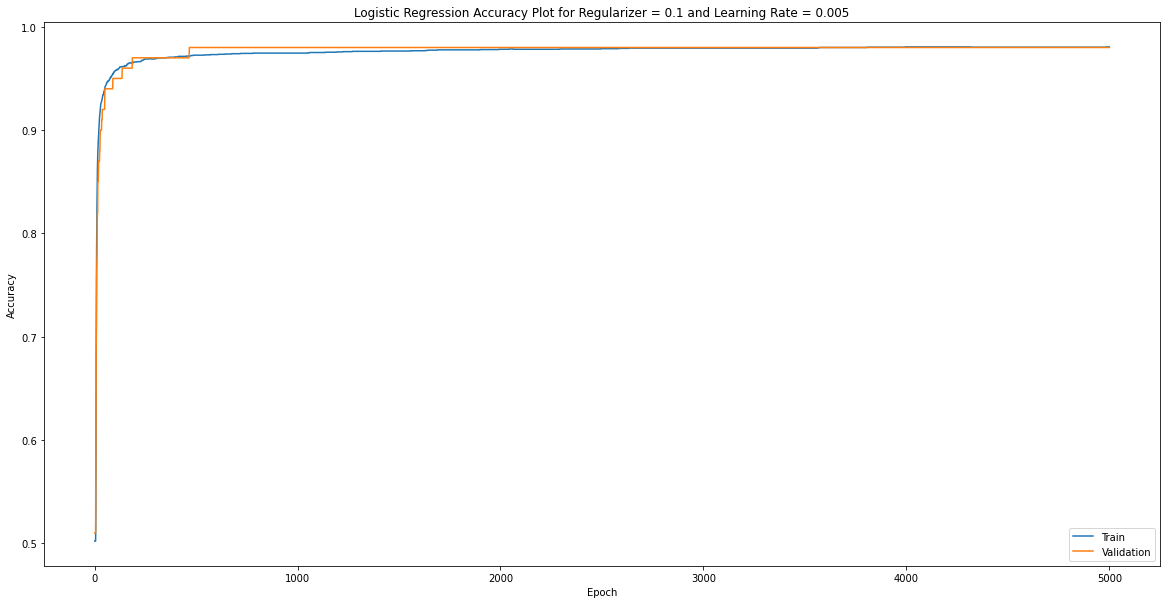

Final Training Accuracy: 0.9805714285714285
Final Validation Accuracy: 0.98


In [ ]:
reg = 0.1
w_opt, b_opt = grad_descent(W, b, data[0], data[3], alpha, epochs, reg, error_tol, data[1], data[4], data[2], data[5], 0)

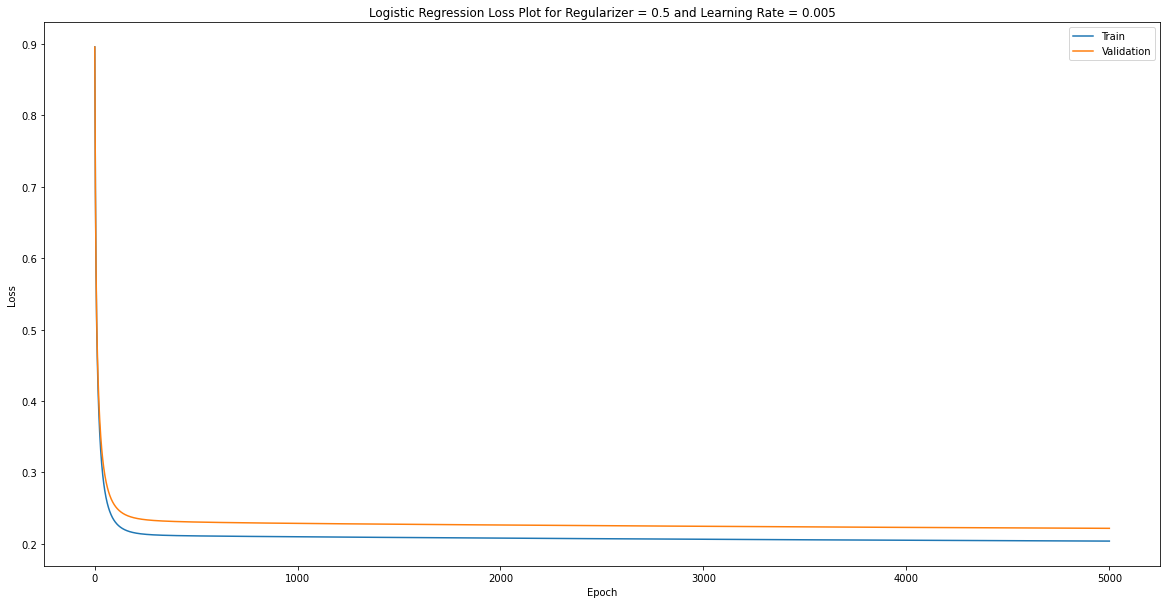

Final Training Loss: 0.20396033167430078
Final Validation Loss: 0.22182160898656966


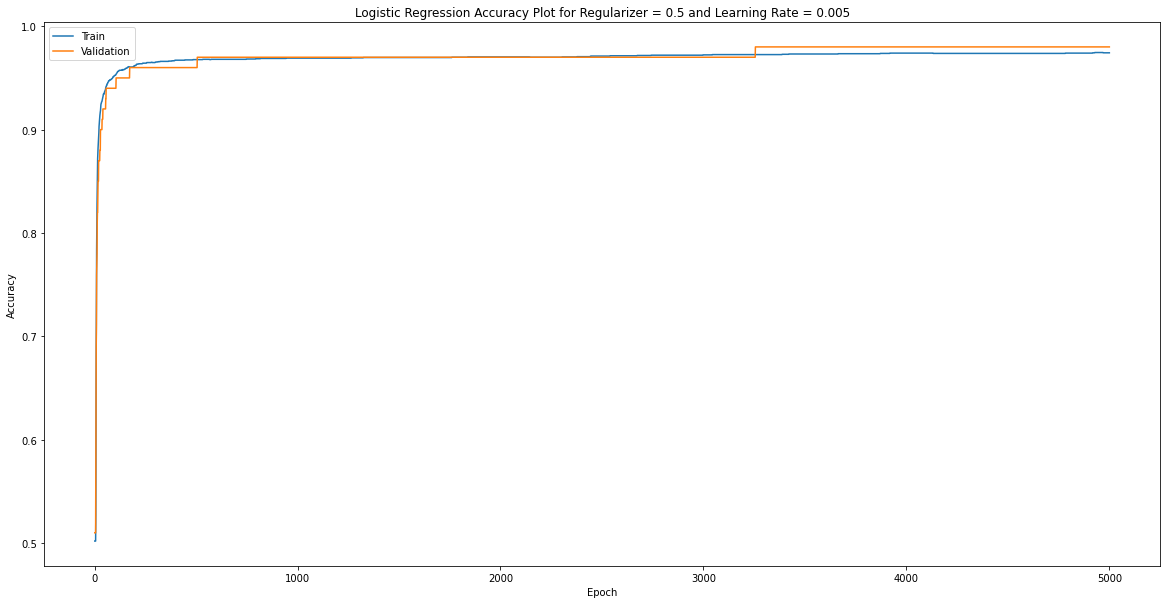

Final Training Accuracy: 0.9742857142857143
Final Validation Accuracy: 0.98


In [ ]:
reg = 0.5
w_opt, b_opt = grad_descent(W, b, data[0], data[3], alpha, epochs, reg, error_tol, data[1], data[4], data[2], data[5], 0)

The best regularizer value is 0.001 as it has the highest training and validation accuracies, along with the lowest training and validation losses. Accuracies and losses are detailed below the various plots.

# Part 2: Logistic Regression in TensorFlow [20 points]

## Part 2.1: Building the Computational Graph [5 pts]:

In [ ]:
def buildGraph(lr,b1,b2,ep):
    weight = tf.Variable(tf.random.truncated_normal(shape=(28*28,1), stddev=0.5, seed=421, dtype=tf.dtypes.float32), trainable=True)
    bias = tf.Variable(initial_value=0, name='b', dtype=tf.float32, trainable=True)

    reg = tf.compat.v1.placeholder(tf.float32, name='reg')
    y_labels = tf.compat.v1.placeholder(tf.float32, name='labels')
    data = tf.compat.v1.placeholder(tf.float32, name='data')

    logit = tf.add(tf.linalg.matmul(data,weight), bias)
    loss = tf.compat.v1.losses.sigmoid_cross_entropy(y_labels, logit) + (reg/2.0)*tf.norm(weight)**2
    
    opt = tf.compat.v1.train.AdamOptimizer(learning_rate=lr, beta1=b1, beta2=b2, epsilon=ep).minimize(loss)
    
    return weight, bias, logit, y_labels, loss, opt, data, reg

## Part 2.2: Implementing Stochastic Gradient Descent [5 pts]:

In [ ]:
def get_accuracy(pred, label):
    pred = sigmoid(pred)
    f = lambda z: z > 0.5
    pred = f(pred).reshape(-1, 1).astype(np.int)
    correct = np.where(pred == label)[0].size
    return correct / np.shape(label)[0]

In [ ]:
def plot_curves2(reg, alpha, batchsize, b1, b2, ep, train_acc, train_loss, val_acc, val_loss, test_acc, test_loss, plot_test):
    n = len(train_acc)
    plt.figure(figsize=(20,10))
    plt.title('TF Model Loss for alpha={}, reg={}, batch={}, b1={}, b2={}, eps={}'.format(alpha,reg,batchsize,b1,b2,ep))
    plt.plot(range(1,1+n), train_loss, label="Train")
    plt.plot(range(1,1+n), val_loss, label="Validation")
    if plot_test:
        plt.plot(range(1,1+n), test_loss, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()
    print("Final Training Loss: {}".format(train_loss[-1]))
    print("Final Validation Loss: {}".format(val_loss[-1]))
    if plot_test:
        print("Final Testing Loss: {}".format(test_loss[-1]))

    plt.figure(figsize=(20,10))
    plt.title('TF Model Accuracy for alpha={}, reg={}, batch={}, b1={}, b2={}, eps={}'.format(alpha,reg,batchsize,b1,b2,ep))
    plt.plot(range(1,1+n), train_acc, label="Train")
    plt.plot(range(1,1+n), val_acc, label="Validation")
    if plot_test:
        plt.plot(range(1,1+n), test_acc, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    if plot_test:
        print("Final Testing Loss: {}".format(test_acc[-1]))

In [ ]:
def tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, bs, reg, lr, b1, b2, ep, plot_test):
    tf.compat.v1.set_random_seed(421)
    W, b, pred, y, loss, optim, d, r = buildGraph(lr,b1,b2,ep)
    init_op = tf.compat.v1.global_variables_initializer()

    N = train_data.shape[0]
    batches = int(N/bs)
    train_accs, val_accs, train_losses, val_losses, test_accs, test_losses = [], [], [], [], [], []

    train_data = np.reshape(train_data, (3500, -1))
    valid_data = np.reshape(valid_data, (100, -1))
    test_data = np.reshape(test_data, (145, -1))

    with tf.compat.v1.Session() as sess:
        sess.run(init_op)

        for e in range(0, epochs, 1):
            shuffled = np.random.permutation(N)
            train_data, trainTarget = train_data[shuffled], trainTarget[shuffled]

            train_loss = 0.0
            train_acc = 0.0

            for iter in range(0, batches, 1):
                iter *= bs
                _, train_predicts, batch_loss = sess.run([optim, pred, loss], feed_dict={r:reg, d:train_data[iter:iter+bs], y:trainTarget[iter:iter+bs]})
                batch_acc = get_accuracy(train_predicts, trainTarget[iter:iter+bs])
                train_loss += batch_loss
                train_acc += batch_acc

            train_acc /= batches
            train_loss /= batches

            valid_predicts,valid_loss = sess.run([pred, loss], feed_dict={r:reg, d:valid_data, y:validTarget})
            valid_acc = get_accuracy(valid_predicts, validTarget)

            test_predicts,test_loss = sess.run([pred, loss], feed_dict={r:reg, d:test_data, y:testTarget})
            test_acc = get_accuracy(test_predicts, testTarget)
                
            train_accs.append(train_acc)
            train_losses.append(train_loss)
            val_accs.append(valid_acc)
            val_losses.append(valid_loss)
            test_accs.append(test_acc)
            test_losses.append(test_loss)

        sess.close()

    plot_curves2(reg, lr, bs, b1, b2, ep, train_accs, train_losses, val_accs, val_losses, test_accs, test_losses, plot_test)   

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


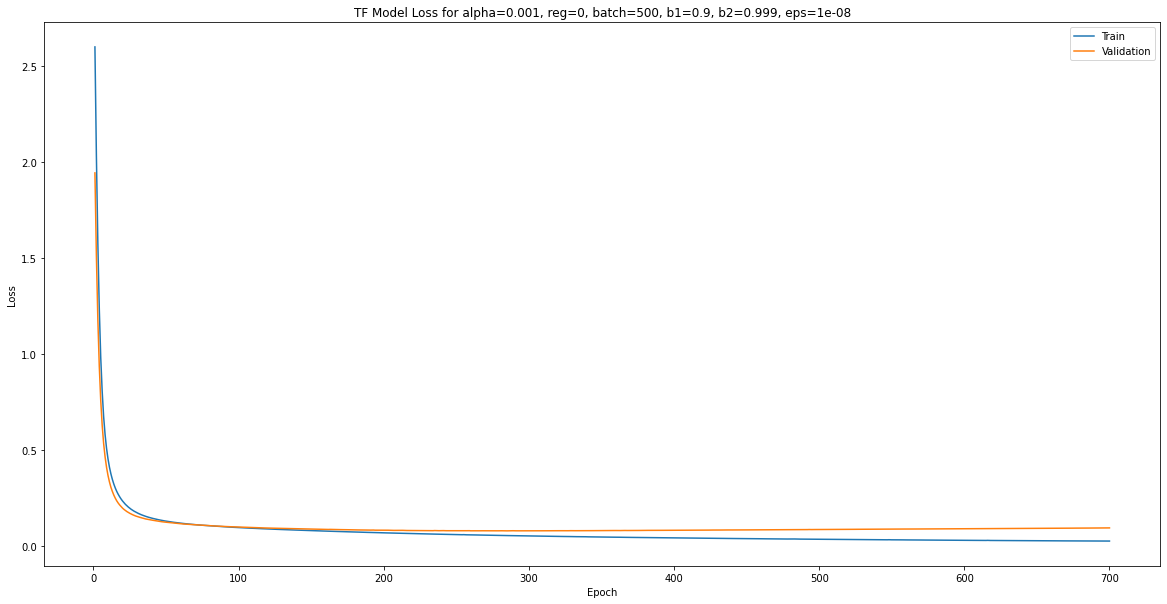

Final Training Loss: 0.023955746021653925
Final Validation Loss: 0.09247422218322754


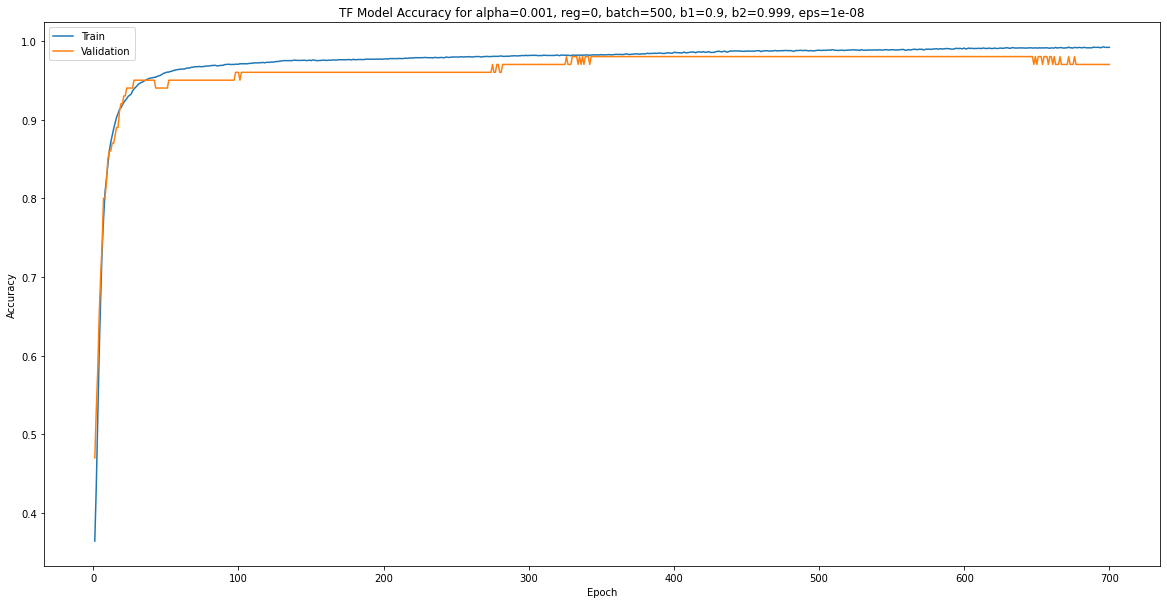

Final Training Accuracy: 0.9917142857142858
Final Validation Accuracy: 0.97


In [ ]:
train_data, valid_data, test_data, trainTarget, validTarget, testTarget = loadData()

epochs = 700
batchsize = 500
reg = 0
lr = 0.001
b1 = 0.9
b2 = 0.999
ep = 1e-08

tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, batchsize, reg, lr, b1, b2, ep, 0)

## Part 2.3: Batch Size Investigation [4 pts]

In [ ]:
epochs = 700
reg = 0
lr = 0.001
b1 = 0.9
b2 = 0.999
ep = 1e-08

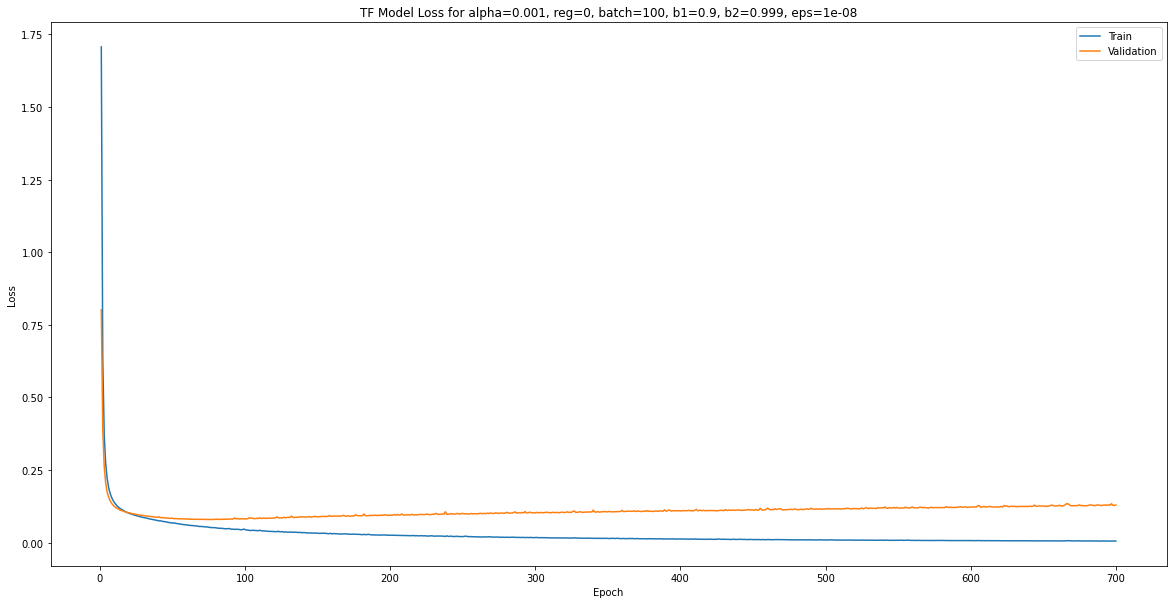

Final Training Loss: 0.005516839270213885
Final Validation Loss: 0.12970606982707977


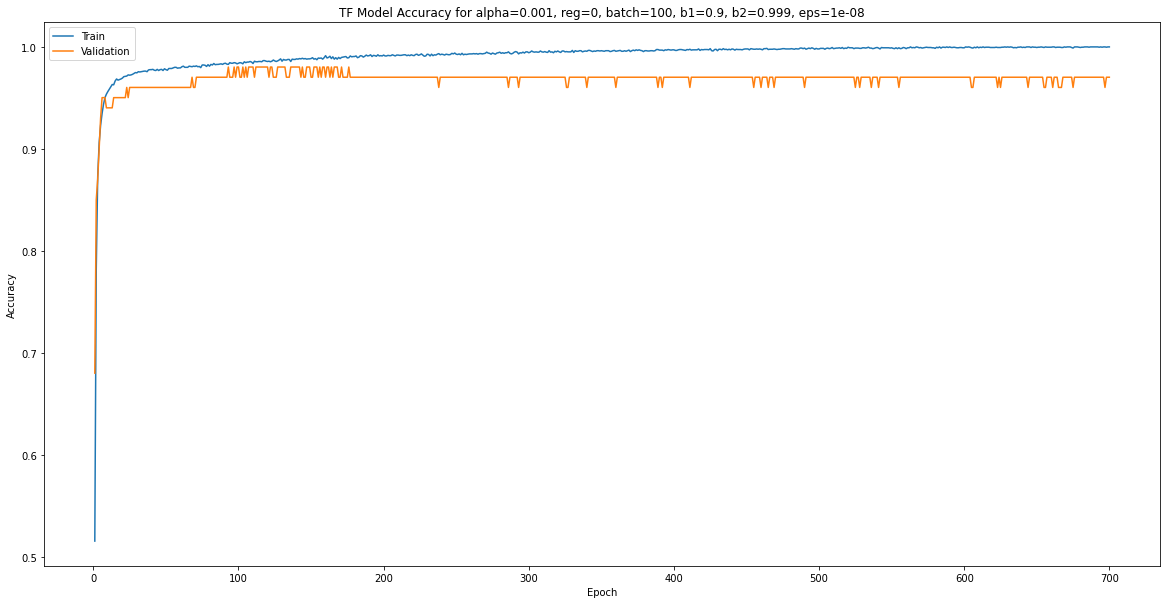

Final Training Accuracy: 0.9997142857142856
Final Validation Accuracy: 0.97


In [ ]:
batchsize = 100
tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, batchsize, reg, lr, b1, b2, ep, 0)

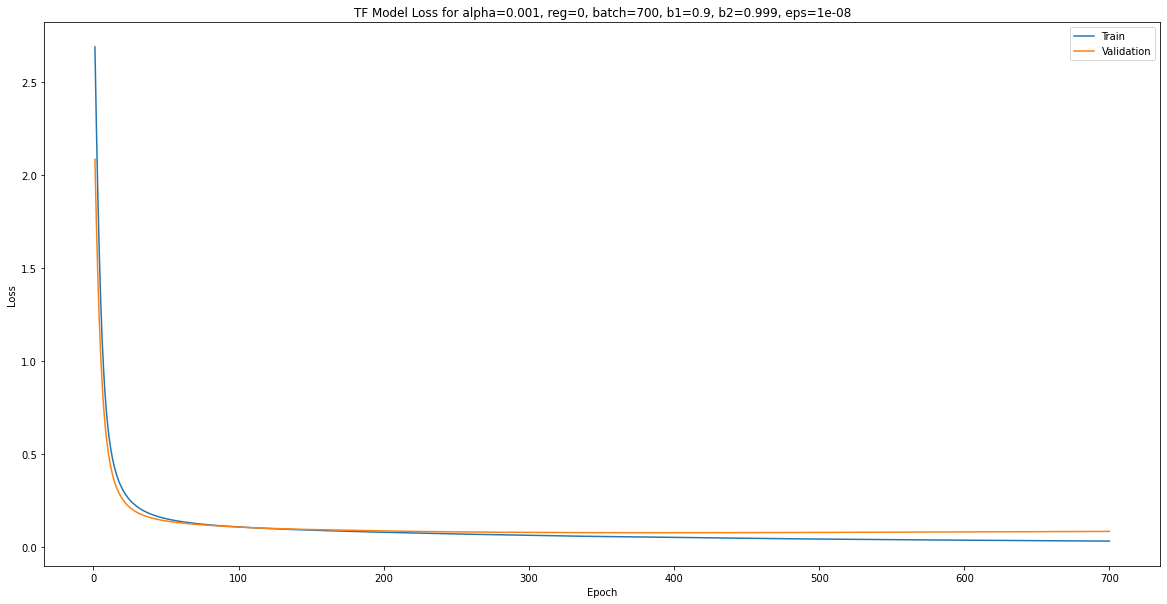

Final Training Loss: 0.031789862737059596
Final Validation Loss: 0.0839378833770752


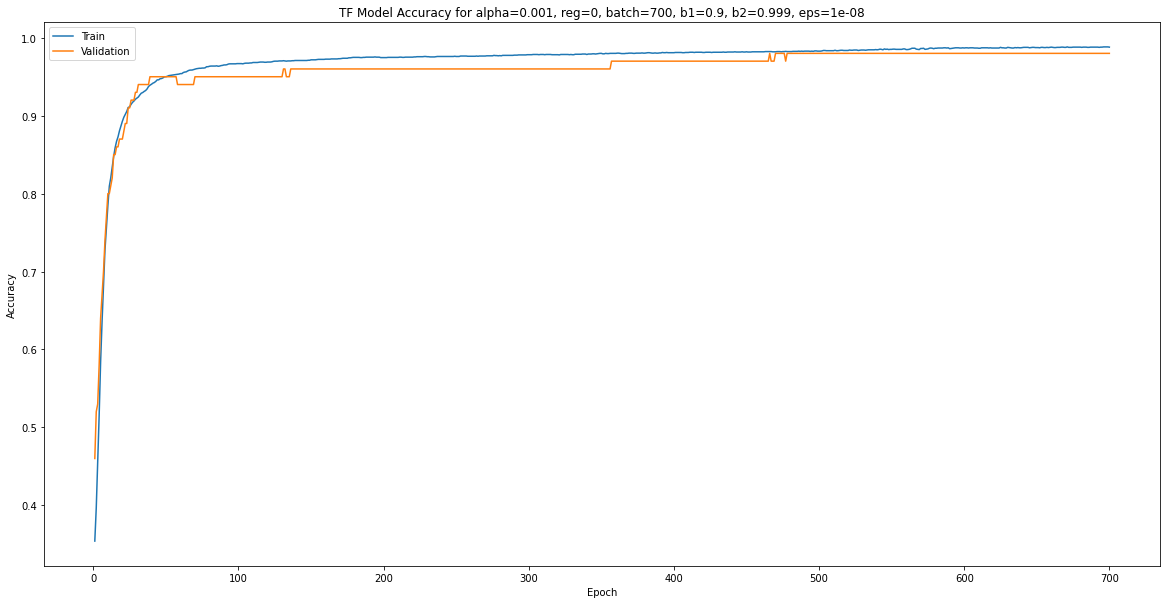

Final Training Accuracy: 0.9879999999999999
Final Validation Accuracy: 0.98


In [ ]:
batchsize = 700
tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, batchsize, reg, lr, b1, b2, ep, 0)

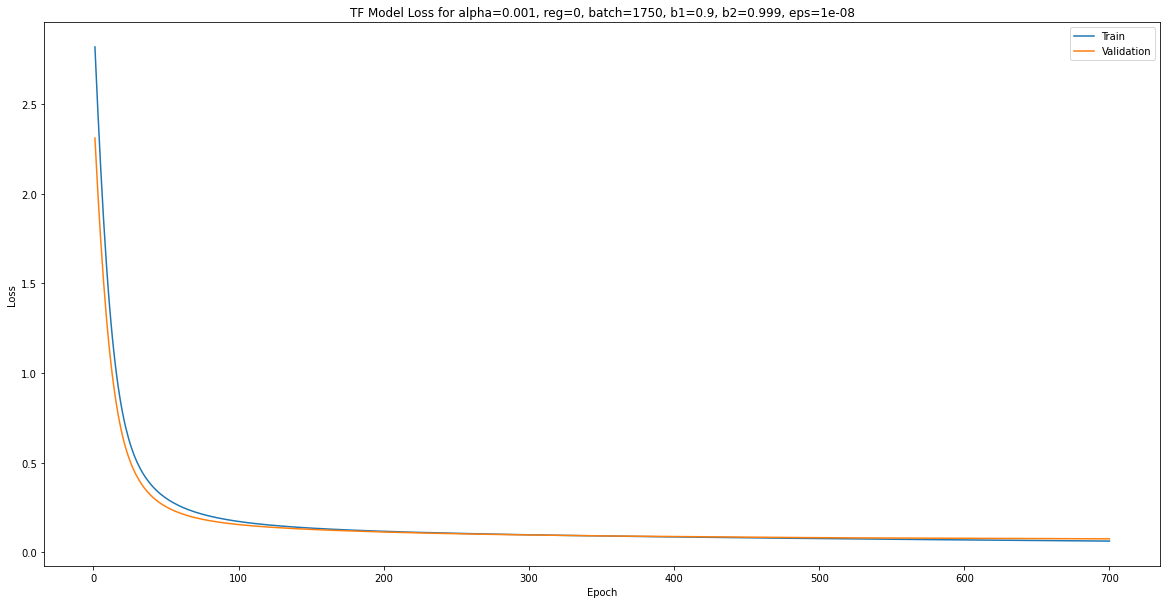

Final Training Loss: 0.06273969635367393
Final Validation Loss: 0.07531404495239258


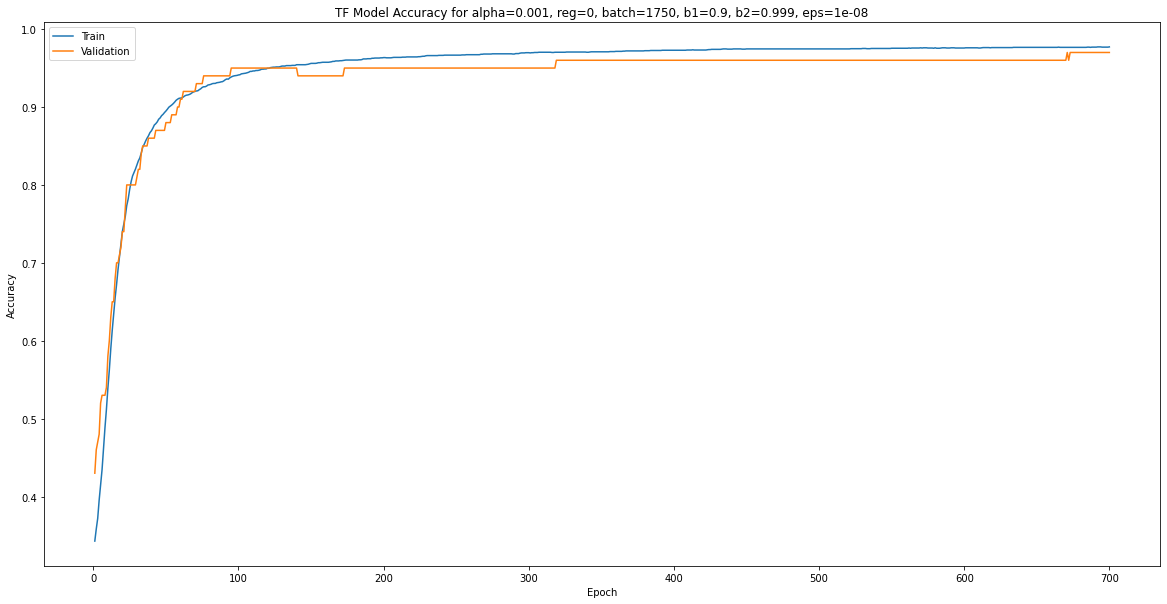

Final Training Accuracy: 0.9771428571428571
Final Validation Accuracy: 0.97


In [ ]:
batchsize = 1750
tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, batchsize, reg, lr, b1, b2, ep, 0)

For batch size = 100:
> The batch size is too small as the model is overfitting onto the training data. This is evident as the training loss curve starts to curve upwards after reaching a minimum at an early epoch. Furthermore, the validation accuracy drastically drops off and slowly decreases while the training accuracy continues to increase. 

For batch size = 700:
> The larger batch size prevents the model from memorizing the training dataset. This prevents overfitting. This also makes the loss and accuracy curves less prone to drastic fluctuations because it lessens the impact of any singular training sample on the loss function. Instead, the training loss and accuracy are averaged out over all the mini-batches. Thus, the curves are smoother as the model is trained

For batch size = 1750:
> It is similar to the case above, but the final training and validation results are slightly worse. This suggests that the batch size is too large, preventing the model from picking up from small intercracies between classes and improving the loss function.


## Part 2.4: Hyperparameter Investigation [4 pts]

In [ ]:
epochs = 700
batchsize = 500
reg = 0
lr = 0.001

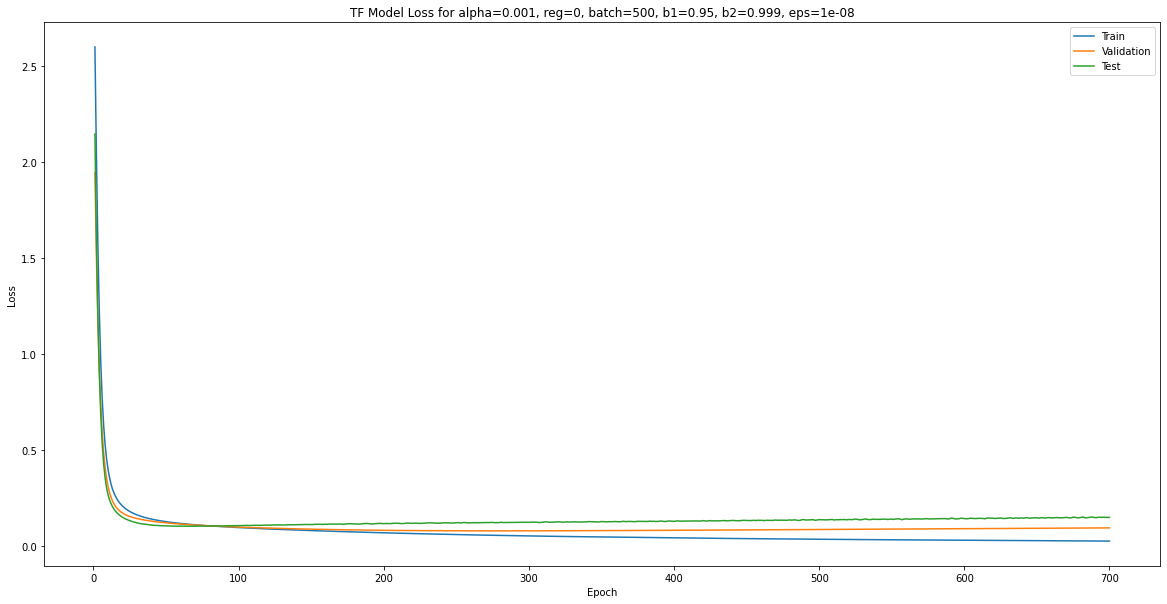

Final Training Loss: 0.023351098942969526
Final Validation Loss: 0.09217014163732529
Final Testing Loss: 0.14704181253910065


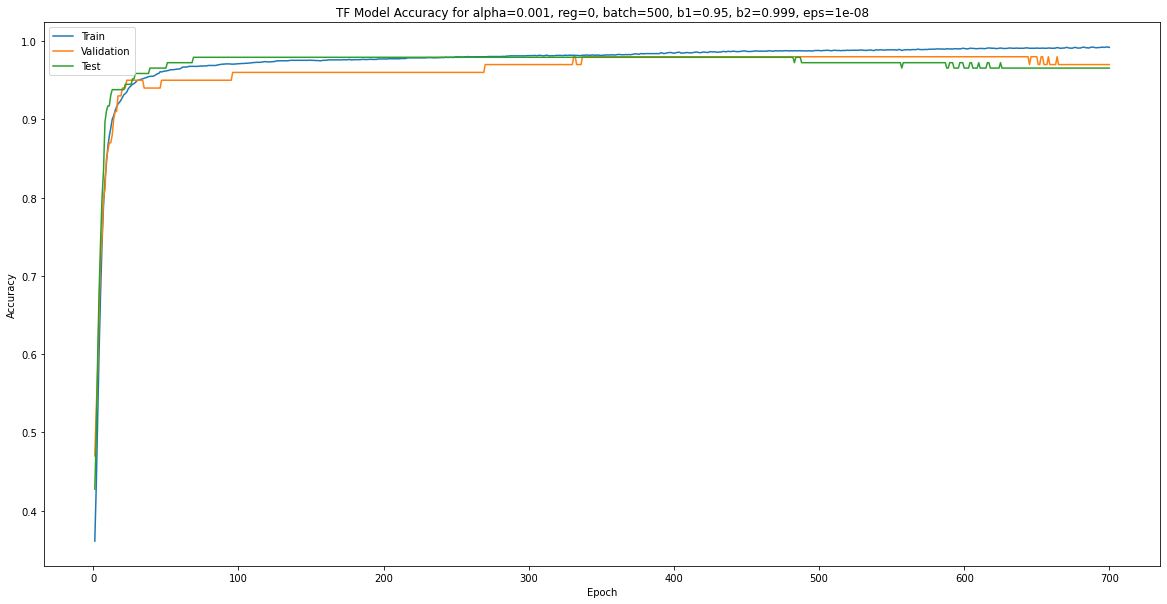

Final Training Accuracy: 0.9919999999999999
Final Validation Accuracy: 0.97
Final Testing Loss: 0.9655172413793104


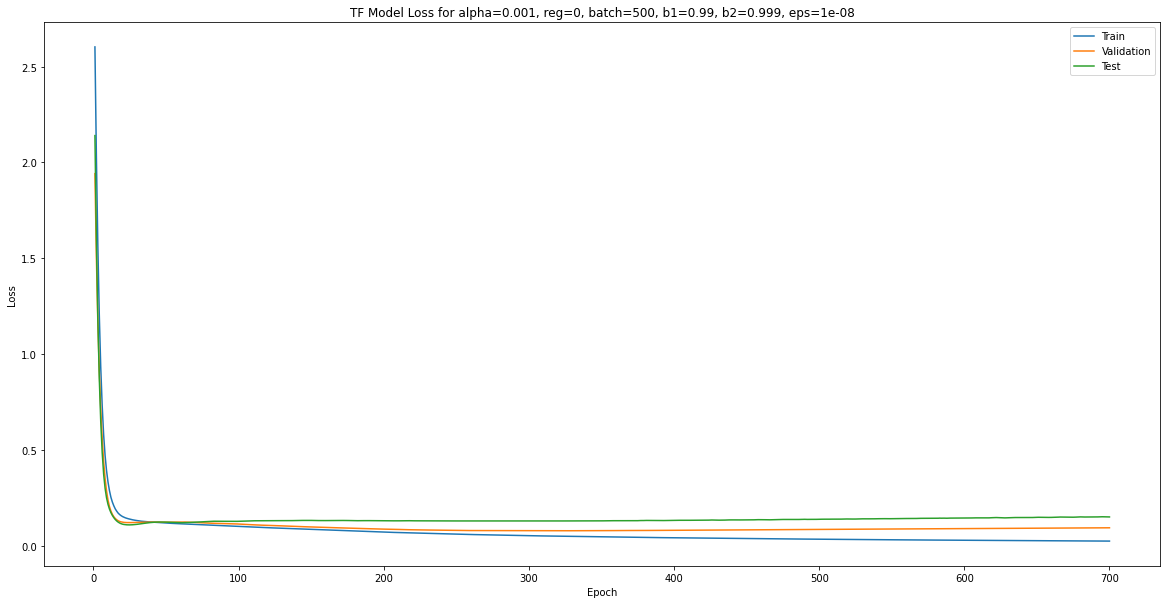

Final Training Loss: 0.0231417143451316
Final Validation Loss: 0.09255855530500412
Final Testing Loss: 0.14922943711280823


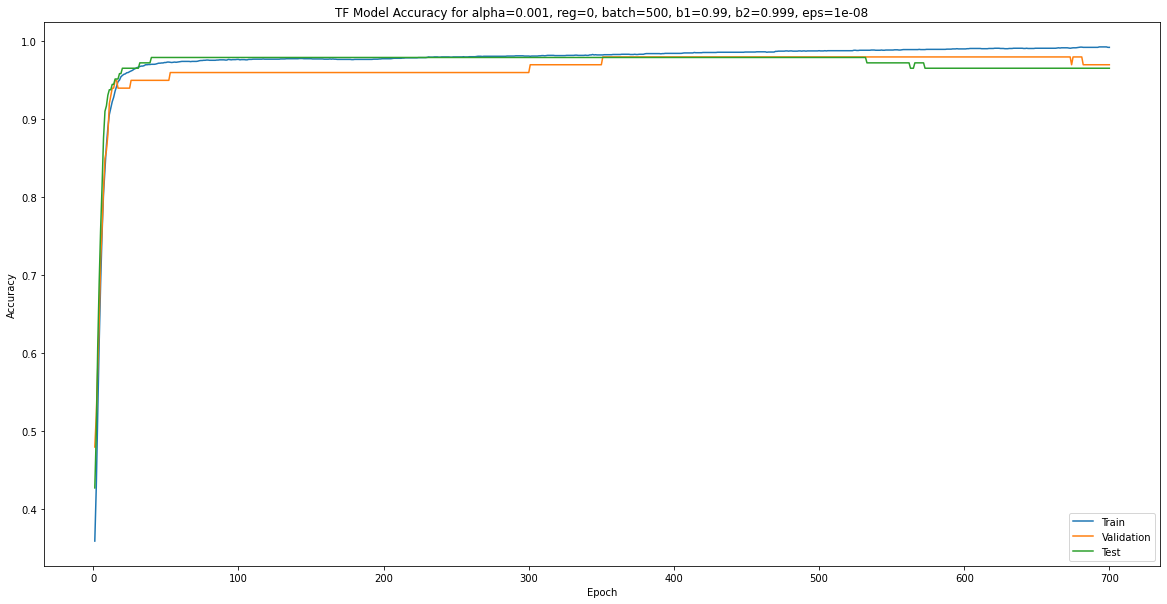

Final Training Accuracy: 0.9922857142857142
Final Validation Accuracy: 0.97
Final Testing Loss: 0.9655172413793104


In [ ]:
b1 = [0.95,0.99]
b2 = 0.999
ep = 1e-08

for b in b1:
    tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, batchsize, reg, lr, b, b2, ep, 1)

The best value for this hyperparameter is b1 = 0.99 for the marginally better training, validation and testing accuracies. However, the losses are marginally worse than b1 = 0.9. Check the numerical results under the respective plots.

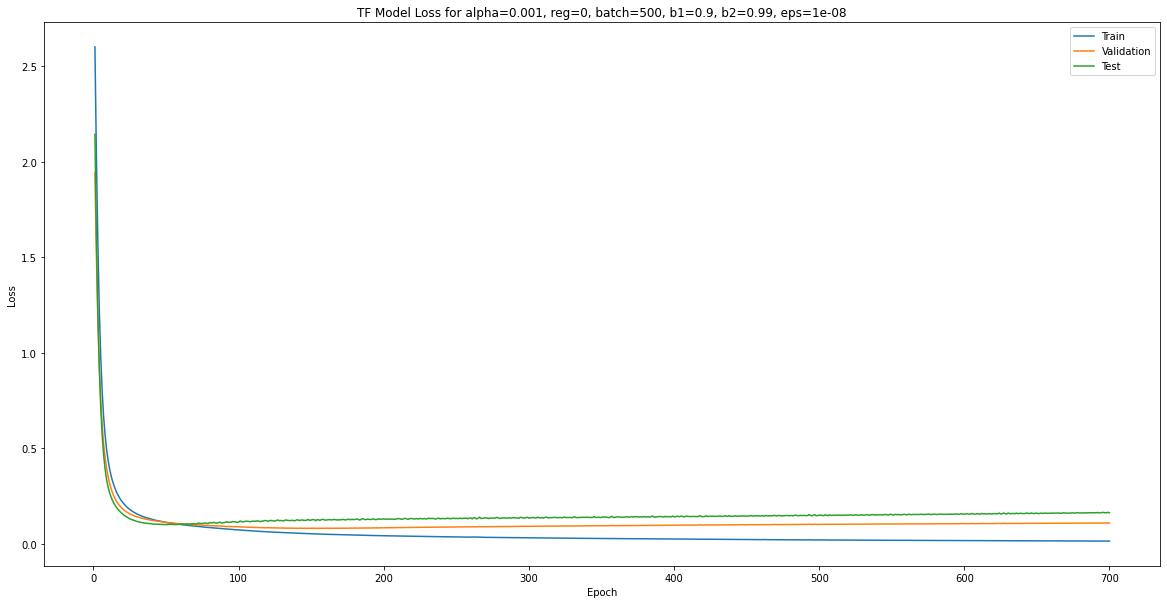

Final Training Loss: 0.013694826646574907
Final Validation Loss: 0.10803565382957458
Final Testing Loss: 0.16136053204536438


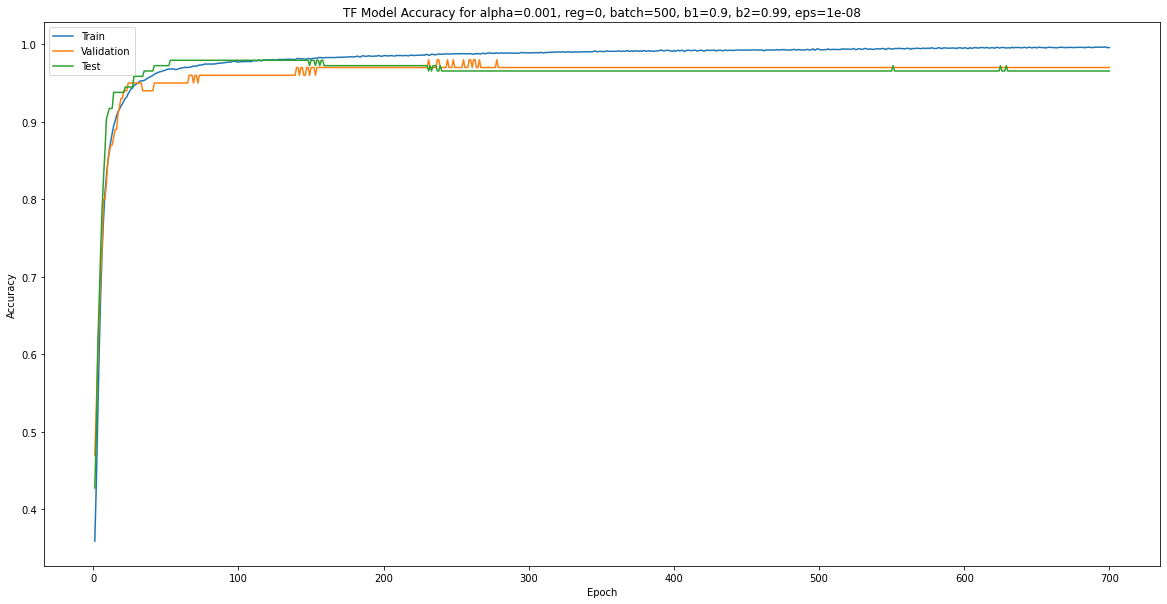

Final Training Accuracy: 0.9957142857142857
Final Validation Accuracy: 0.97
Final Testing Loss: 0.9655172413793104


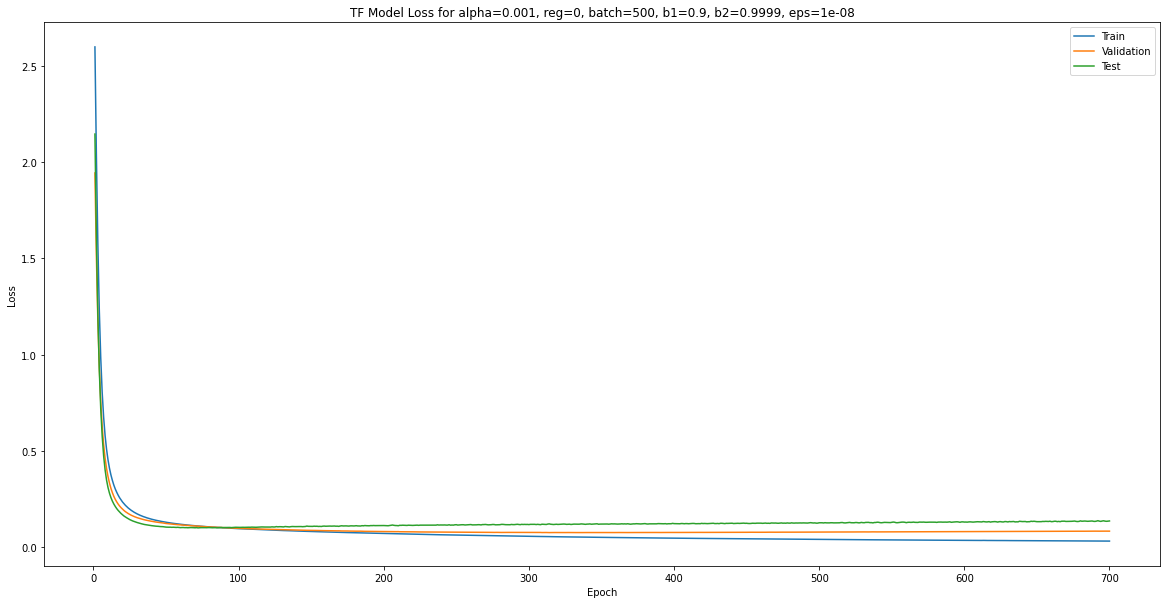

Final Training Loss: 0.03151368855365685
Final Validation Loss: 0.08310148119926453
Final Testing Loss: 0.13593488931655884


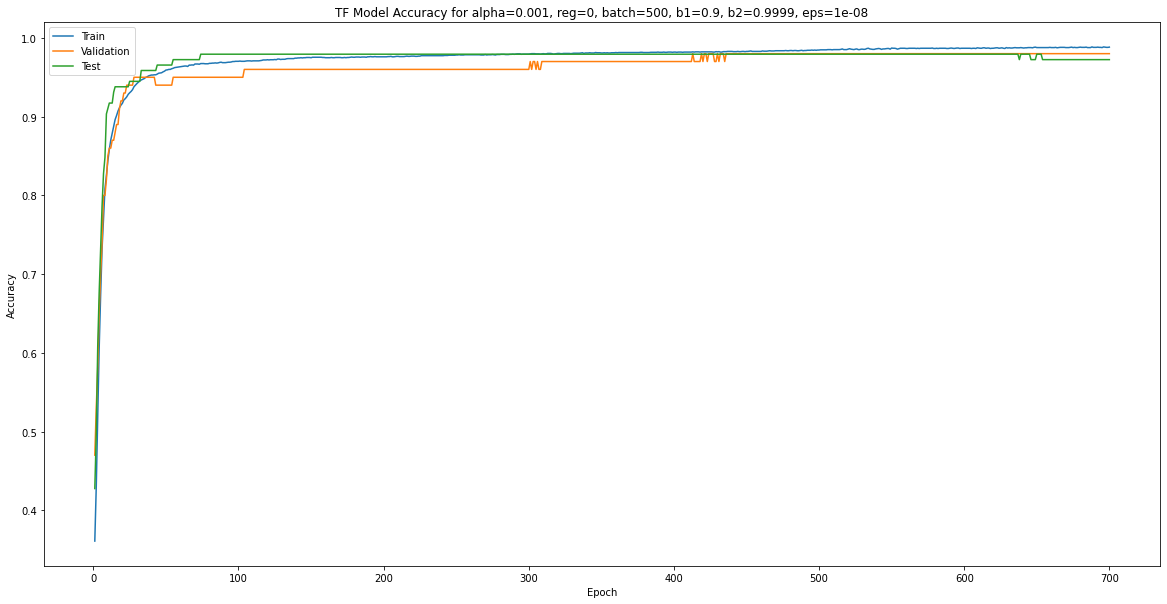

Final Training Accuracy: 0.9882857142857144
Final Validation Accuracy: 0.98
Final Testing Loss: 0.9724137931034482


In [ ]:
b1 = 0.9
b2 = [0.99, 0.9999]
ep = 1e-08

for b in b2:
    tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, batchsize, reg, lr, b1, b, ep, 1)

The best value for this hyperparameter is b2 = 0.9999 as the loss for the training, validation and testing datasets are significantly better while the accuracies are marginally better than b2 = 0.99. Check the numerical results under the plots.

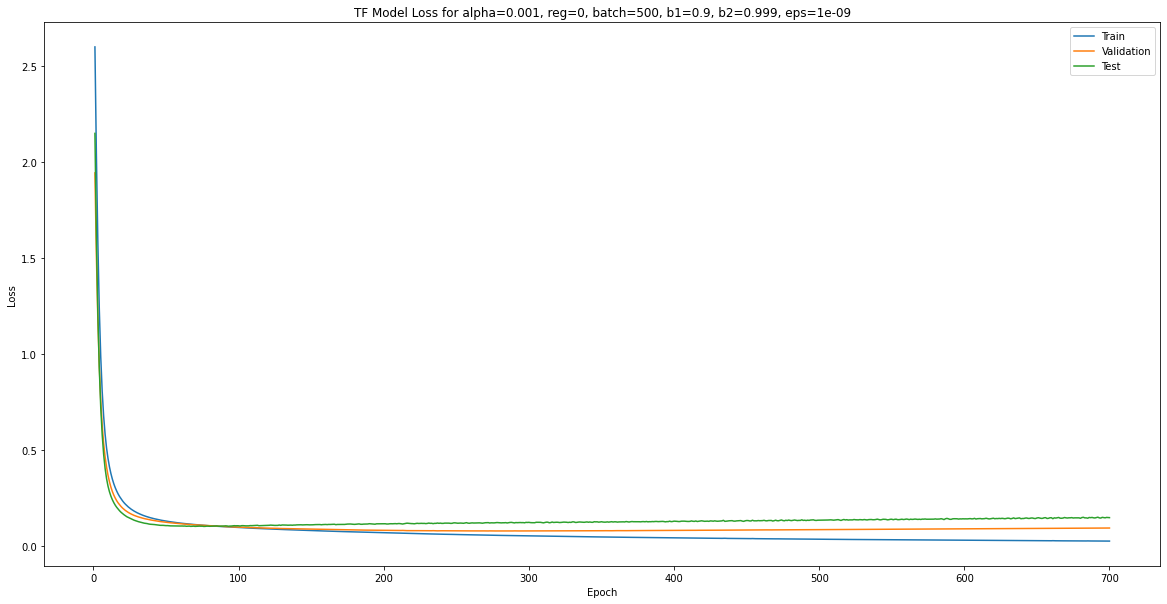

Final Training Loss: 0.023689877108803818
Final Validation Loss: 0.09175388514995575
Final Testing Loss: 0.14587081968784332


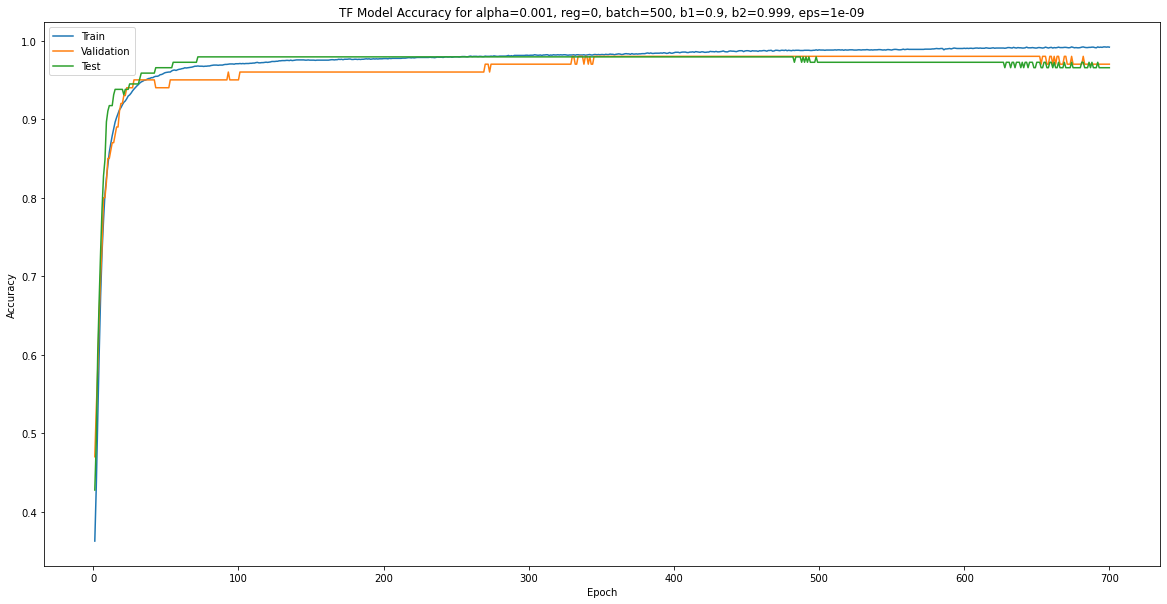

Final Training Accuracy: 0.9917142857142858
Final Validation Accuracy: 0.97
Final Testing Loss: 0.9655172413793104


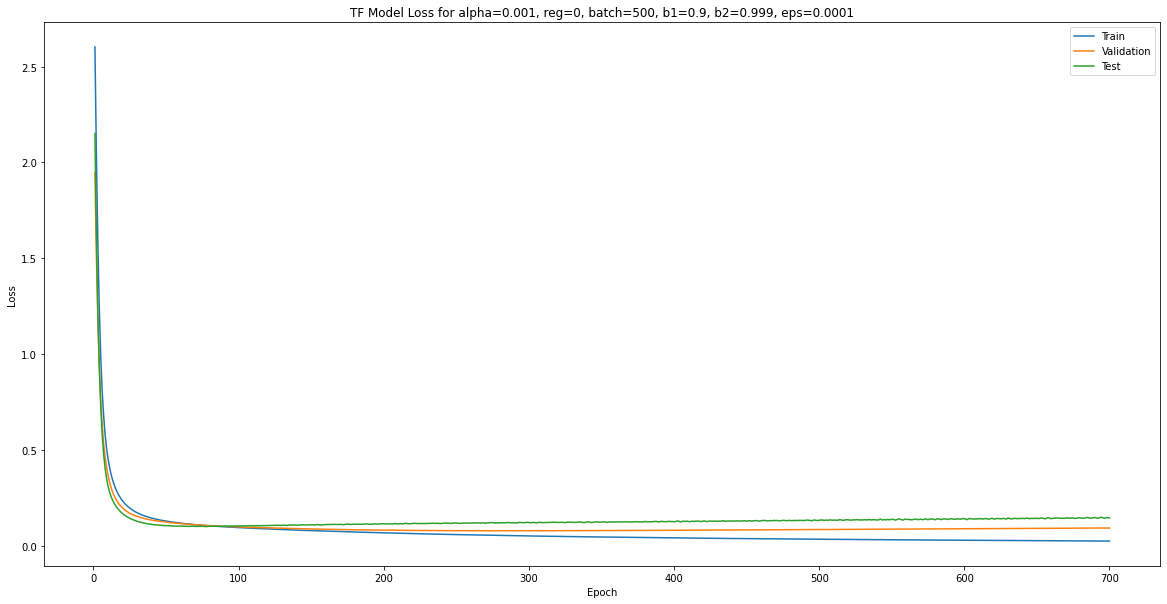

Final Training Loss: 0.024093201916132654
Final Validation Loss: 0.09229236841201782
Final Testing Loss: 0.14544492959976196


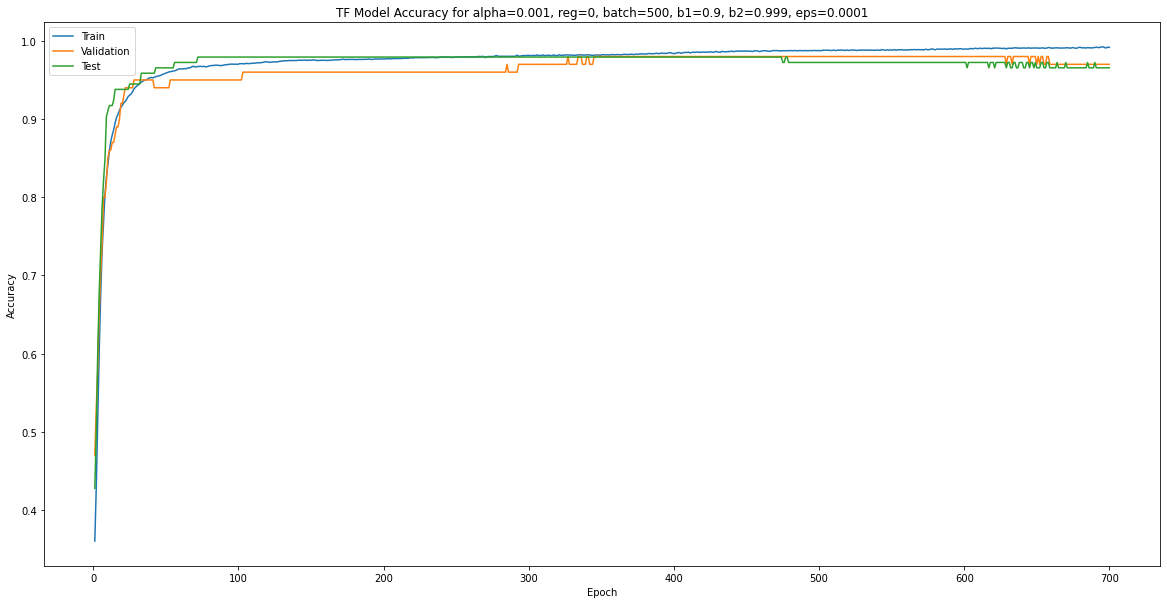

Final Training Accuracy: 0.9917142857142857
Final Validation Accuracy: 0.97
Final Testing Loss: 0.9655172413793104


In [ ]:
b1 = 0.9
b2 = 0.999
ep = [1e-09, 1e-4]

for e in ep:
    tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, batchsize, reg, lr, b1, b2, e, 1)

The final results are nearly identical. However, note that ep=0.0001 visually converged to its maximum value faster than ep=0=1e-09. At the end, the accuracies for ep=0.0001 dipped but were still compare to the maximum values of ep=1e-09. So ep=0.0001 would be the preferred choice as long as we decrease the number of epochs (700 is too large regardless for this dataset) Check the numbers under the plots.

## Part 2.5: Comparison against Batch GD [2 pts]

The best hyperparameters for adam are:

> b1 = 0.99

> b2 = 0.999

> ep = 0.0001

> batch size = 700

This combination is better than the numpy linear regression because of the added benefits of momentum in the Adam optimizer and minibatching resulted in it converging quicker and to better results.

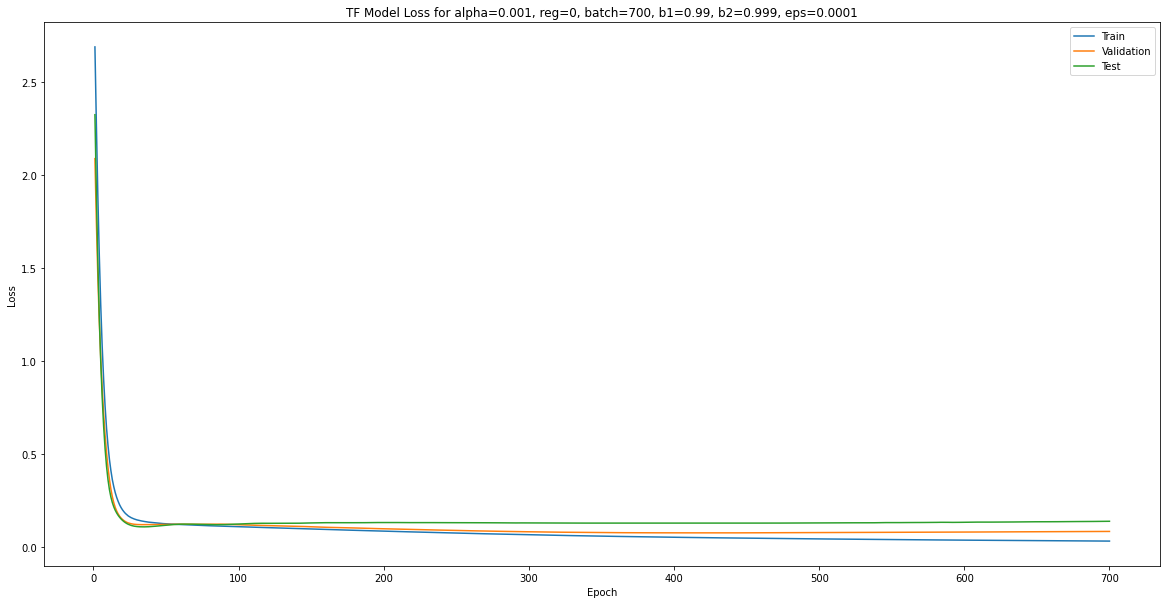

Final Training Loss: 0.03188286423683166
Final Validation Loss: 0.08385931700468063
Final Testing Loss: 0.1384604126214981


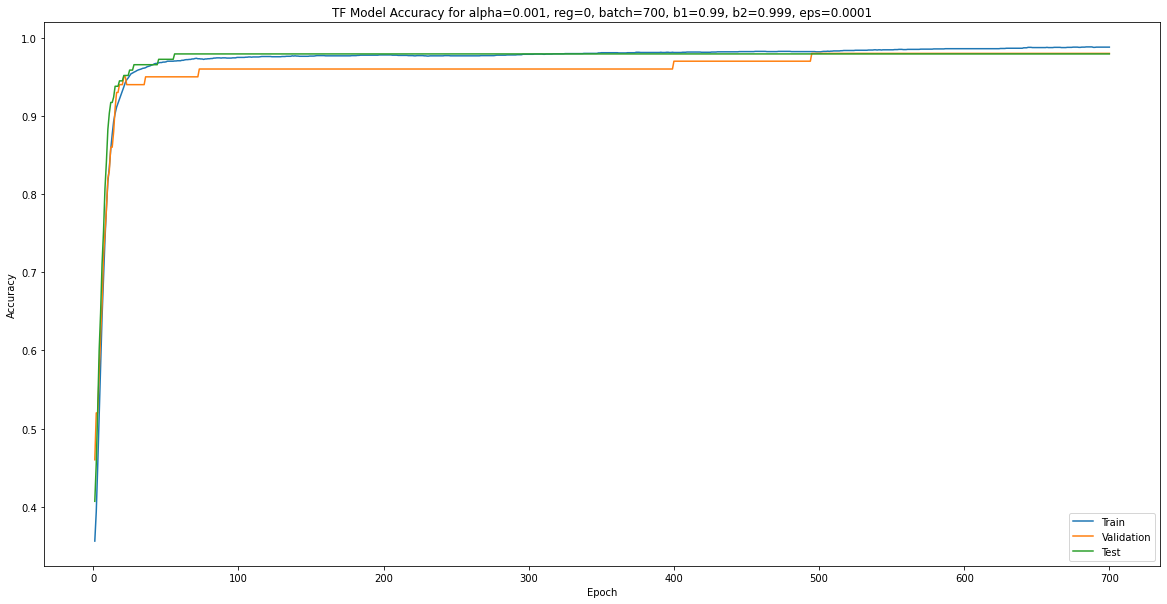

Final Training Accuracy: 0.9880000000000001
Final Validation Accuracy: 0.98
Final Testing Loss: 0.9793103448275862


In [ ]:
epochs = 700
batchsize = 700
reg = 0
lr = 0.001
b1 = 0.99
b2 = 0.999
ep = 1e-04

tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, batchsize, reg, lr, b1, b2, ep, 1)